# Forecasting

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seaborn

In [3]:
df = pd.read_csv('london_weather.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [4]:
df.isna().sum().sort_values(ascending=False)

snow_depth          1441
mean_temp             36
cloud_cover           19
global_radiation      19
max_temp               6
precipitation          6
pressure               4
min_temp               2
date                   0
sunshine               0
dtype: int64

In [5]:
df['snow_depth']=df['snow_depth'].fillna(0)

In [6]:
df['date'].head()

0    19790101
1    19790102
2    19790103
3    19790104
4    19790105
Name: date, dtype: int64

In [7]:
df['date']= pd.to_datetime(df['date'],format='%Y%m%d',errors='coerce')
'''df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day'''

"df['year'] = df['date'].dt.year\ndf['month'] = df['date'].dt.month\ndf['day'] = df['date'].dt.day"

In [8]:
print(df['date'].max())
print(df['date'].min())
df = df.set_index("date")

2020-12-31 00:00:00
1979-01-01 00:00:00


In [9]:
interp_cols = ['max_temp', 'min_temp', 'mean_temp', 'pressure',
               'global_radiation', 'cloud_cover',"precipitation"]

# time-aware interpolation; limit avoids long bridges
df[interp_cols] = (
    df[interp_cols]
      .interpolate(method='time', limit=3, limit_direction='both')
      .ffill().bfill()
)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15341 entries, 1979-01-01 to 2020-12-31
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cloud_cover       15341 non-null  float64
 1   sunshine          15341 non-null  float64
 2   global_radiation  15341 non-null  float64
 3   max_temp          15341 non-null  float64
 4   mean_temp         15341 non-null  float64
 5   min_temp          15341 non-null  float64
 6   precipitation     15341 non-null  float64
 7   pressure          15341 non-null  float64
 8   snow_depth        15341 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


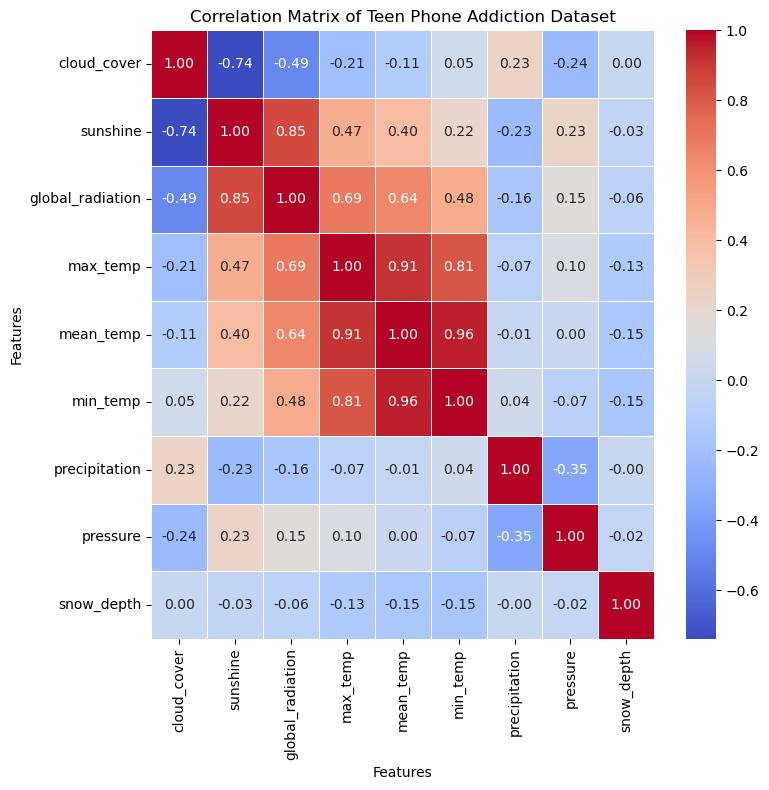

In [11]:
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(8, 8))
seaborn.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Teen Phone Addiction Dataset")
plt.xlabel("Features")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

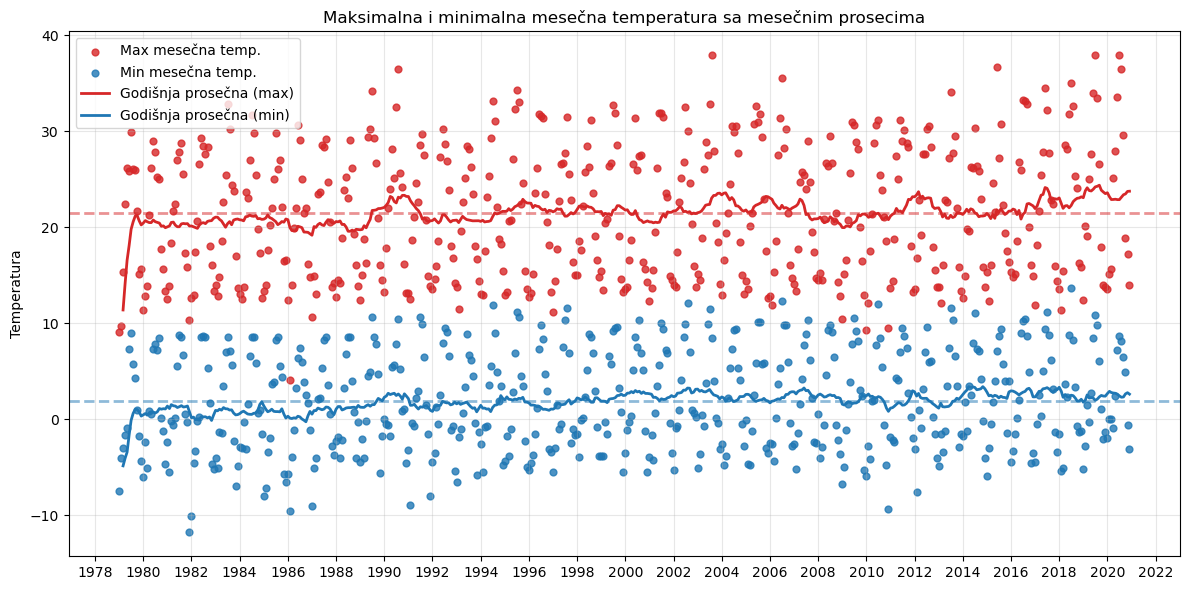

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Mesečni ekstremi temperatura
mx = df['max_temp'].resample('MS').max()
mn = df['min_temp'].resample('MS').min()

# Rolling averages (12 months; tweak window as needed)
window = 12
mx_ma = mx.rolling(window, min_periods=3).mean()
mn_ma = mn.rolling(window, min_periods=3).mean()

fig, ax = plt.subplots(figsize=(12,6))

ax.scatter(mx.index, mx.values, color='tab:red', s=24, alpha=0.8, label='Max mesečna temp.')
ax.scatter(mn.index, mn.values, color='tab:blue', s=24, alpha=0.8, label='Min mesečna temp.')

ax.plot(mx_ma.index, mx_ma.values, color='tab:red', lw=2, label=f'Godišnja prosečna (max)')
ax.plot(mn_ma.index, mn_ma.values, color='tab:blue', lw=2, label=f'Godišnja prosečna (min)')

# Optional overall mean (dashed)
ax.axhline(mx.mean(), color='tab:red', ls='--', lw=2, alpha=0.5)
ax.axhline(mn.mean(), color='tab:blue', ls='--', lw=2, alpha=0.5)

ax.set_title('Maksimalna i minimalna mesečna temperatura sa mesečnim prosecima')
ax.set_xlabel('')
ax.set_ylabel('Temperatura')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(2))      # prikaz svake 2 godine
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.grid(True, alpha=0.3)
ax.legend(loc="best")
plt.tight_layout()


In [13]:
print(mx_ma.head())

date
1979-01-01          NaN
1979-02-01          NaN
1979-03-01    11.366667
1979-04-01    14.125000
1979-05-01    16.540000
Freq: MS, Name: max_temp, dtype: float64


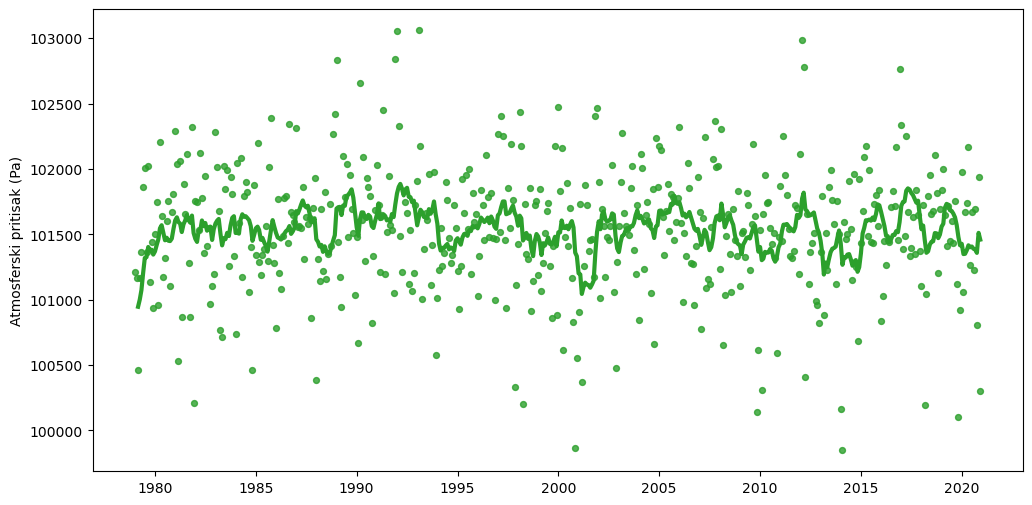

In [14]:
mean_p = df['pressure'].resample('MS').mean()
mean_ma = mean_p.rolling(12, min_periods=3).mean()
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(mean_p.index, mean_p.values, s=18, color='tab:green', alpha=0.8, label='Monthly mean pressure')
ax.set_ylabel('Atmosferski pritisak (Pa)')
ax.plot(mean_ma.index, mean_ma.values, color='tab:green', lw=3, label='12-mo avg')

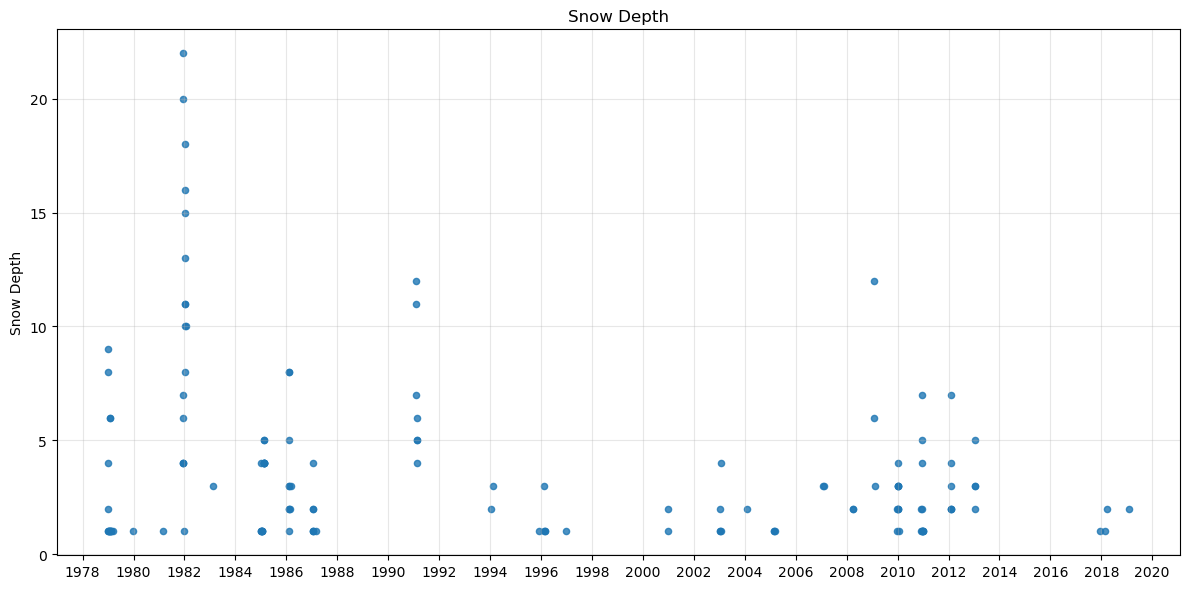

In [15]:
import matplotlib.pyplot as plt, matplotlib.dates as mdates
nz = df.loc[df['snow_depth'].ne(0), 'snow_depth']
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(nz.index, nz.values, s=20,color='tab:blue', alpha=0.8)
ax.set_title('Snow Depth'); ax.set_xlabel(''); ax.set_ylabel('Snow Depth')
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.grid(True, alpha=0.3)
plt.tight_layout()

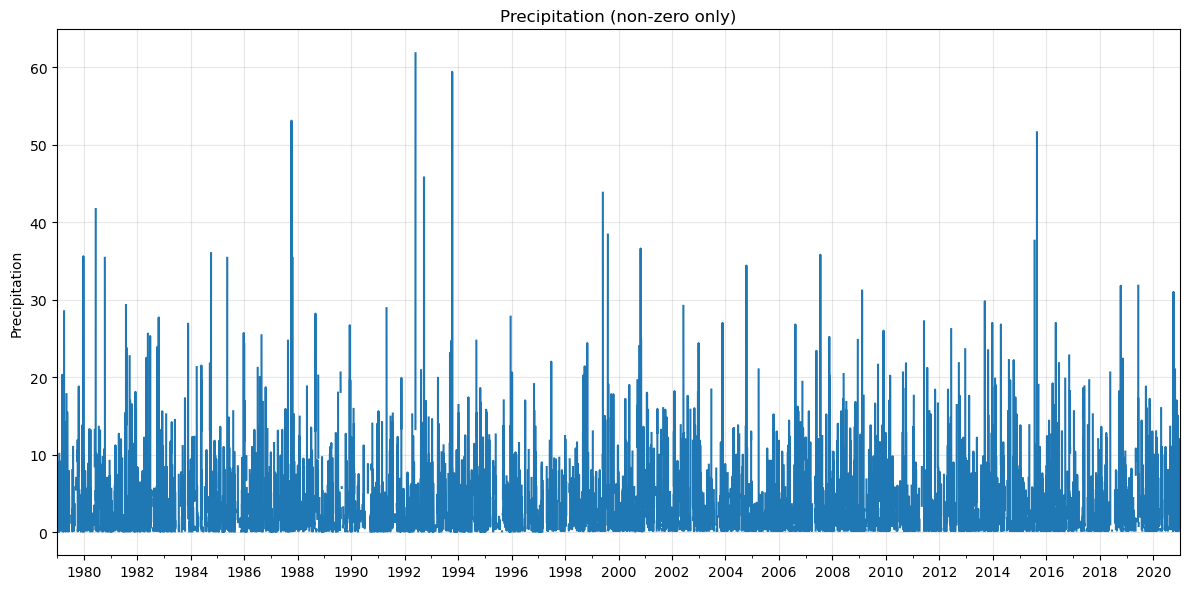

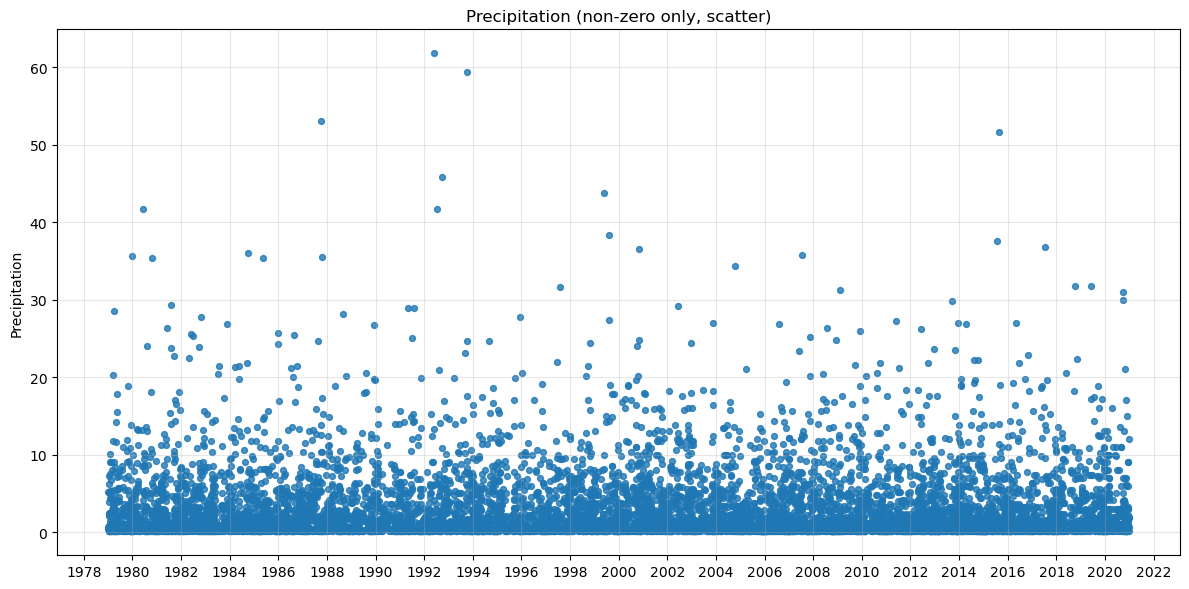

In [16]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Try to find the precipitation column (common + misspellings)
cols = {c.lower(): c for c in df.columns}
precip_col = next((cols[c] for c in [
    'precipitation','precip','prcp','rain','ppt','percipitation','percip','percipretation'
] if c in cols), None)
assert precip_col is not None, f"No precipitation column found in: {list(df.columns)}"

s = df[precip_col]

# Line with gaps (zeros hidden)
ax = s.mask(s.eq(0)).plot(figsize=(12,6), color='tab:blue', lw=1.5, title='Precipitation (non-zero only)')
ax.set_xlabel(''); ax.set_ylabel('Precipitation')
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.grid(True, alpha=0.3)
plt.tight_layout()

# Scatter of non-zero points
nz = s[s.ne(0)]
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(nz.index, nz.values, s=18, color='tab:blue', alpha=0.8)
ax.set_title('Precipitation (non-zero only, scatter)'); ax.set_xlabel(''); ax.set_ylabel('Precipitation')
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.grid(True, alpha=0.3)
plt.tight_layout()


In [17]:
df['precipitation'].describe()

count    15341.000000
mean         1.668320
std          3.737984
min          0.000000
25%          0.000000
50%          0.000000
75%          1.600000
max         61.800000
Name: precipitation, dtype: float64

In [18]:
df['rain_tommorrow']=df['precipitation'].shift(-1).astype(bool)
df=df.iloc[:-1]
df[['precipitation','rain_tommorrow']].tail(10)

,precipitation,rain_tommorrow
date,,
2020-12-21,3.0,True
2020-12-22,0.6,True
2020-12-23,1.8,False
2020-12-24,0.0,False
2020-12-25,0.0,True
2020-12-26,12.0,True
2020-12-27,2.0,True
2020-12-28,0.2,False
2020-12-29,0.0,False


In [19]:
x = df.copy()
x.drop(columns=['rain_tommorrow'], inplace=True)
y = df['rain_tommorrow']
x.info()
y.info()
x.shape, y.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15340 entries, 1979-01-01 to 2020-12-30
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cloud_cover       15340 non-null  float64
 1   sunshine          15340 non-null  float64
 2   global_radiation  15340 non-null  float64
 3   max_temp          15340 non-null  float64
 4   mean_temp         15340 non-null  float64
 5   min_temp          15340 non-null  float64
 6   precipitation     15340 non-null  float64
 7   pressure          15340 non-null  float64
 8   snow_depth        15340 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB
<class 'pandas.core.series.Series'>
DatetimeIndex: 15340 entries, 1979-01-01 to 2020-12-30
Series name: rain_tommorrow
Non-Null Count  Dtype
--------------  -----
15340 non-null  bool 
dtypes: bool(1)
memory usage: 134.8 KB


((15340, 9), (15340,))

In [20]:
from sklearn.preprocessing import StandardScaler
n = len(x)
train_end = int(n * 0.7)
val_end = int(n * 0.85)

x_train, y_train = x.iloc[:train_end], y.iloc[:train_end]
x_val, y_val = x.iloc[train_end:val_end], y.iloc[train_end:val_end]
x_test, y_test = x.iloc[val_end:], y.iloc[val_end:]

scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)
x_test_s = scaler.transform(x_test)

(len(x_train_s), len(x_val), len(x_test))

(10738, 2301, 2301)

In [21]:
import tensorflow as tf
def build_model(input_dim, seed=42):
    tf.keras.utils.set_random_seed(seed)
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dense(1, activation="relu")
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    return model

model = build_model(x_train_s.shape[1])
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

history = model.fit(
    x_train_s, y_train,
    validation_data=(x_val_s, y_val),
    epochs=100,
    batch_size=64,
    callbacks=[early_stop],
    verbose=0
)


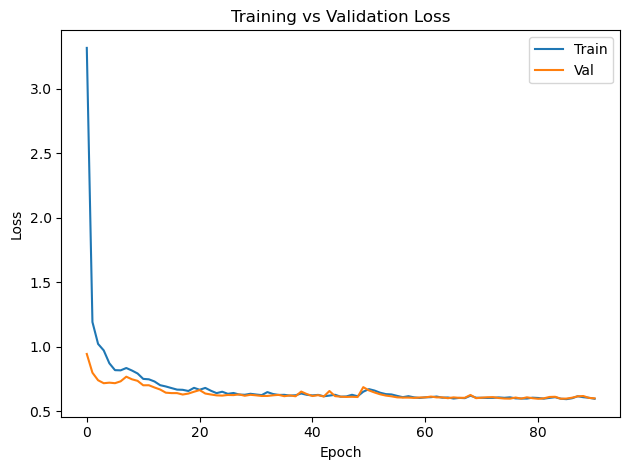

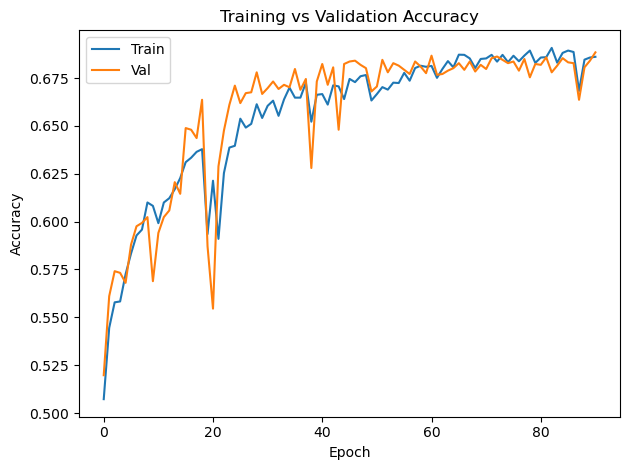

In [22]:

# Loss
plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Val"])
plt.tight_layout()
plt.show()

# Accuracy (if available)
if "accuracy" in history.history and "val_accuracy" in history.history:
    plt.figure()
    plt.plot(history.history["accuracy"])
    plt.plot(history.history["val_accuracy"])
    plt.title("Training vs Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["Train", "Val"])
    plt.tight_layout()
    plt.show()


72/72 [==============================] - 0s 1ms/step
Test Accuracy: 0.6810
Test ROC-AUC: 0.7415272824077855
Confusion Matrix:
 [[817 371]
 [363 750]]


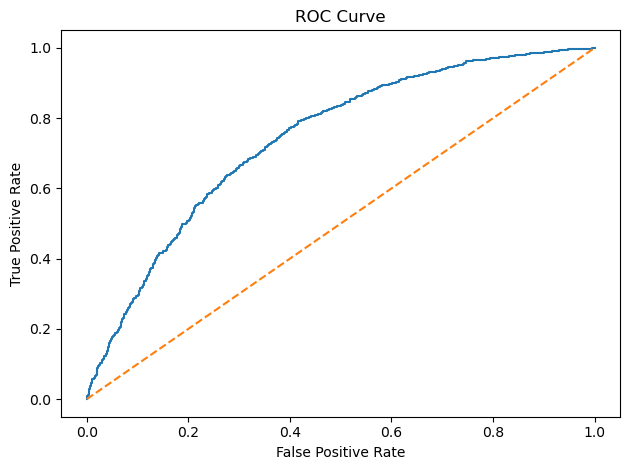

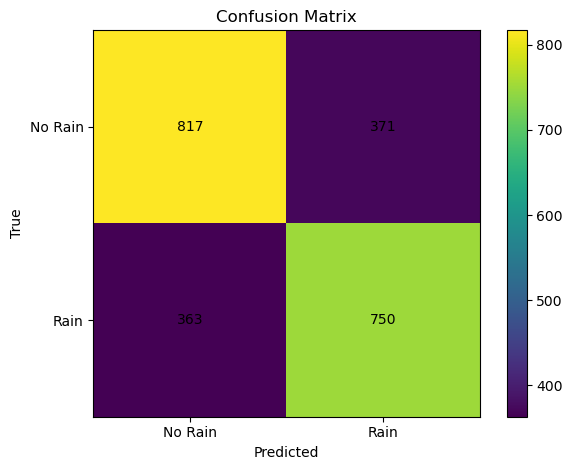

In [23]:
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve
proba_test = model.predict(x_test_s).ravel()
pred_test = (proba_test >= 0.5).astype(int)

acc = accuracy_score(y_test, pred_test)
try:
    auc = roc_auc_score(y_test, proba_test)
except ValueError:
    auc = float("nan")

cm = confusion_matrix(y_test, pred_test)
print(f"Test Accuracy: {acc:.4f}")
print("Test ROC-AUC:", auc if (isinstance(auc, float) and not np.isnan(auc)) else "N/A")
print("Confusion Matrix:\n", cm)

# ROC curve
if len(np.unique(y_test)) == 2:
    fpr, tpr, _ = roc_curve(y_test, proba_test)
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.tight_layout()
    plt.show()

# Confusion matrix heatmap
plt.figure()
plt.imshow(cm, interpolation="nearest")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks([0,1], ["No Rain", "Rain"])
plt.yticks([0,1], ["No Rain", "Rain"])
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha="center", va="center")
plt.colorbar()
plt.tight_layout()
plt.show()
